# Applications of Changing Basis: From Theory to Practice

## Transforming Perspectives to Reveal Hidden Structure in Data

Welcome to the practical world of **changing basis** - one of the most powerful concepts in linear algebra and machine learning! 

### What You'll Master in This Notebook:

1. **🎯 The Core Concept**: Why we change basis (it's all about finding better perspectives)
2. **📊 Real Data Applications**: How PCA, neural networks, and image processing use basis changes
3. **🔍 Signal vs Noise Separation**: Using basis changes to isolate meaningful patterns
4. **🧮 Mathematical Implementation**: The mechanics behind coordinate transformations
5. **💡 Intuitive Understanding**: When and why to apply these techniques

### The Big Picture: Why Change Basis?

Think of changing basis as **rotating your perspective** to see data more clearly:

- **Standard basis** (x, y axes): Often arbitrary and may not align with data patterns
- **New basis**: Chosen to reveal structure, reduce noise, or simplify analysis

**Real-world analogy**: Imagine you're looking at a tilted photograph. Rotating it to be upright (changing basis) makes it much easier to understand!

### Key Applications We'll Explore:

| Application | What It Does | Why Change Basis? |
|-------------|--------------|-------------------|
| **PCA** | Finds main directions of variation | Separates signal from noise |
| **Image Compression** | Reduces storage while preserving quality | Eliminates redundant information |
| **Face Recognition** | Identifies key facial features | Focuses on discriminating characteristics |
| **Neural Networks** | Learns optimal feature representations | Discovers meaningful patterns automatically |

---

## 1. The Fundamental Problem: Data Doesn't Always Align with Our Axes

Let's start with a concrete example that demonstrates why the standard x-y coordinate system isn't always the best choice for understanding data.


🔧 Libraries loaded successfully!
Ready to explore the power of changing basis!

STEP 1: Creating Data with Hidden Linear Structure
📊 Generated 50 data points
📈 True relationship: y ≈ 1.5 × x + noise
🎯 Goal: Find this relationship automatically using basis change

🔍 Applying PCA to discover the natural basis...
✅ PCA completed!
📐 First principal component (main direction): [0.54996638 0.8351868 ]
📐 Second principal component (noise direction): [ 0.8351868  -0.54996638]
📊 Variance explained by 1st component: 99.6%
📊 Variance explained by 2nd component: 0.4%


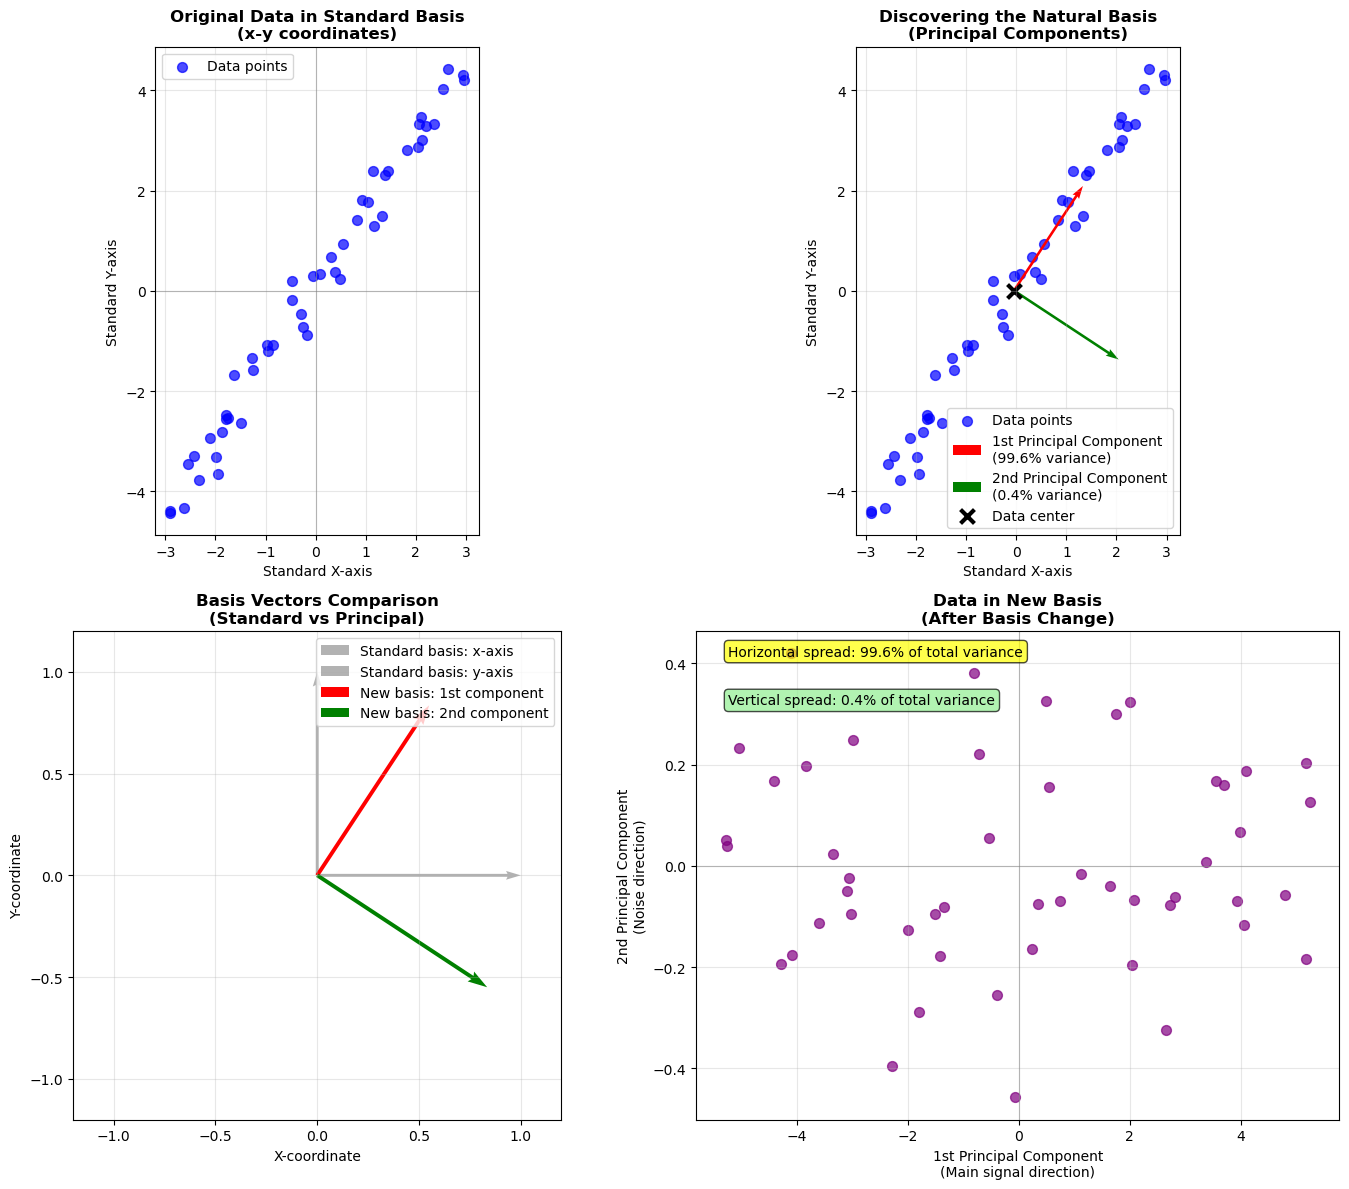


💡 Key Observations:
1. 🎯 The 1st principal component captures 99.6% of the variance
2. 🎯 The 2nd principal component captures only 0.4% (mostly noise)
3. 🔄 Changing basis reveals the true 1D structure hidden in 2D data
4. ✨ In the new basis, the main pattern is along the horizontal axis!


In [1]:
# Import all necessary libraries for our basis change demonstrations
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set up high-quality plotting
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

print("🔧 Libraries loaded successfully!")
print("Ready to explore the power of changing basis!")

# === STEP 1: Create Realistic Data with Hidden Structure ===
print("\n" + "="*60)
print("STEP 1: Creating Data with Hidden Linear Structure")
print("="*60)

# Set random seed for reproducibility
np.random.seed(42)

# Create data that lies approximately along a line (hidden 1D structure in 2D space)
n_points = 50
t = np.linspace(-3, 3, n_points)  # Parameter along the "true" direction

# The data actually follows this relationship: y ≈ 1.5x + noise
# But in standard coordinates, this isn't immediately obvious
true_slope = 1.5
x_coords = t + np.random.normal(0, 0.2, n_points)  # Add some noise
y_coords = true_slope * t + np.random.normal(0, 0.3, n_points)  # Main relationship + noise

# Stack into a data matrix (each row is a data point)
data = np.column_stack([x_coords, y_coords])

print(f"📊 Generated {n_points} data points")
print(f"📈 True relationship: y ≈ {true_slope} × x + noise")
print(f"🎯 Goal: Find this relationship automatically using basis change")

# === STEP 2: Apply PCA to Find the Natural Coordinate System ===
print(f"\n🔍 Applying PCA to discover the natural basis...")

pca = PCA(n_components=2)
pca.fit(data)

# Extract the principal components (new basis vectors)
principal_components = pca.components_  # Each row is a basis vector
data_mean = pca.mean_                   # Center of the data
explained_variance = pca.explained_variance_ratio_

print(f"✅ PCA completed!")
print(f"📐 First principal component (main direction): {principal_components[0]}")
print(f"📐 Second principal component (noise direction): {principal_components[1]}")
print(f"📊 Variance explained by 1st component: {explained_variance[0]:.1%}")
print(f"📊 Variance explained by 2nd component: {explained_variance[1]:.1%}")

# === STEP 3: Comprehensive Visualization ===
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Original data with standard basis
ax1.scatter(data[:, 0], data[:, 1], alpha=0.7, s=50, color='blue', label='Data points')
ax1.axhline(0, color='gray', linewidth=0.8, alpha=0.5)
ax1.axvline(0, color='gray', linewidth=0.8, alpha=0.5)
ax1.set_xlabel('Standard X-axis')
ax1.set_ylabel('Standard Y-axis')
ax1.set_title('Original Data in Standard Basis\n(x-y coordinates)', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_aspect('equal')

# Plot 2: Data with principal components overlaid
ax2.scatter(data[:, 0], data[:, 1], alpha=0.7, s=50, color='blue', label='Data points')

# Draw the principal component vectors from the center of data
scale_factor = 2.5  # Scale for visibility
ax2.quiver(data_mean[0], data_mean[1], 
           principal_components[0, 0] * scale_factor, 
           principal_components[0, 1] * scale_factor,
           angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.008, linewidth=3,
           label=f'1st Principal Component\n({explained_variance[0]:.1%} variance)')

ax2.quiver(data_mean[0], data_mean[1], 
           principal_components[1, 0] * scale_factor, 
           principal_components[1, 1] * scale_factor,
           angles='xy', scale_units='xy', scale=1, 
           color='green', width=0.008, linewidth=3,
           label=f'2nd Principal Component\n({explained_variance[1]:.1%} variance)')

# Show data center
ax2.scatter(data_mean[0], data_mean[1], color='black', s=100, marker='x', linewidth=3, label='Data center')

ax2.set_xlabel('Standard X-axis')
ax2.set_ylabel('Standard Y-axis')
ax2.set_title('Discovering the Natural Basis\n(Principal Components)', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_aspect('equal')

# Plot 3: Show the basis vectors clearly
ax3.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, 
           color='gray', width=0.006, linewidth=2, label='Standard basis: x-axis', alpha=0.6)
ax3.quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1, 
           color='gray', width=0.006, linewidth=2, label='Standard basis: y-axis', alpha=0.6)

ax3.quiver(0, 0, principal_components[0, 0], principal_components[0, 1],
           angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.008, linewidth=3, label='New basis: 1st component')
ax3.quiver(0, 0, principal_components[1, 0], principal_components[1, 1],
           angles='xy', scale_units='xy', scale=1, 
           color='green', width=0.008, linewidth=3, label='New basis: 2nd component')

ax3.set_xlim(-1.2, 1.2)
ax3.set_ylim(-1.2, 1.2)
ax3.set_xlabel('X-coordinate')
ax3.set_ylabel('Y-coordinate')
ax3.set_title('Basis Vectors Comparison\n(Standard vs Principal)', fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()
ax3.set_aspect('equal')

# Plot 4: Data projected onto the principal components
projected_data = pca.transform(data)
ax4.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.7, s=50, color='purple')
ax4.axhline(0, color='gray', linewidth=0.8, alpha=0.5)
ax4.axvline(0, color='gray', linewidth=0.8, alpha=0.5)
ax4.set_xlabel('1st Principal Component\n(Main signal direction)')
ax4.set_ylabel('2nd Principal Component\n(Noise direction)')
ax4.set_title('Data in New Basis\n(After Basis Change)', fontweight='bold')
ax4.grid(True, alpha=0.3)

# Add annotations showing the variance
ax4.text(0.05, 0.95, f'Horizontal spread: {explained_variance[0]:.1%} of total variance', 
         transform=ax4.transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
ax4.text(0.05, 0.85, f'Vertical spread: {explained_variance[1]:.1%} of total variance', 
         transform=ax4.transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))

plt.tight_layout()
plt.show()

print(f"\n💡 Key Observations:")
print(f"1. 🎯 The 1st principal component captures {explained_variance[0]:.1%} of the variance")
print(f"2. 🎯 The 2nd principal component captures only {explained_variance[1]:.1%} (mostly noise)")
print(f"3. 🔄 Changing basis reveals the true 1D structure hidden in 2D data")
print(f"4. ✨ In the new basis, the main pattern is along the horizontal axis!")


---

## 2. Understanding What Just Happened: The Mathematics of Perspective

### 🔍 The Core Insight

What we just witnessed is the power of **changing our coordinate system** to match the natural structure of the data:

| Standard Basis (x, y) | Principal Component Basis |
|----------------------|---------------------------|
| ❌ Arbitrary choice | ✅ Data-driven choice |
| ❌ Doesn't align with data pattern | ✅ Aligns with main variation |
| ❌ Signal mixed across both axes | ✅ Signal concentrated in 1st axis |
| ❌ Hard to see true dimensionality | ✅ Reveals underlying structure |

### 🧮 The Mathematical Transformation

When we change basis, we're essentially **rotating and translating** our coordinate system:

#### Step 1: Center the Data
$$\text{Centered data} = \text{Original data} - \text{Mean}$$

#### Step 2: Find Principal Directions
The principal components are the **eigenvectors** of the covariance matrix, ordered by their **eigenvalues** (importance).

#### Step 3: Transform Coordinates
$$\text{New coordinates} = (\text{Centered data}) \times \text{Principal components}^T$$

This is essentially a **dot product** operation - projecting each data point onto the new basis vectors!

### 🎯 Why This Matters

**Signal vs Noise Separation**: 
- **1st Principal Component**: Captures the main pattern (signal)
- **2nd Principal Component**: Captures deviations from the pattern (noise)

**Dimensionality Revelation**:
- Our 2D data is actually **quasi-1D** - it mostly varies along one direction
- The 2nd dimension adds little information (just noise)

**Practical Implications**:
- We could compress this data to 1D with minimal information loss
- We could denoise the data by ignoring the 2nd component
- We could detect outliers as points far from the main direction

### 🔄 The Basis Change as a New Perspective

Think of it this way:
1. **Before**: Looking at data through standard x-y "glasses"
2. **After**: Looking through "principal component glasses" that align with data's natural flow

It's like rotating a tilted photograph to make it upright - the content is the same, but now it's much easier to understand!

---

## 3. Let's See the Transformation in Action

Now let's explicitly see how each data point's coordinates change when we switch to the new basis.


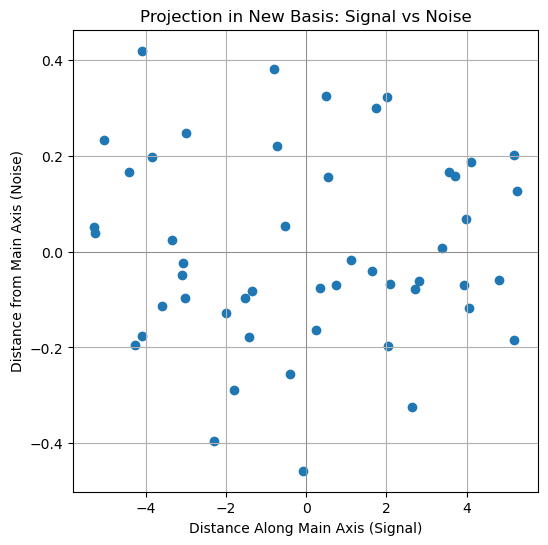

STEP-BY-STEP BASIS TRANSFORMATION
🔧 Performing manual basis transformation...
✅ Step 1: Centered data by subtracting mean [-0.04509478  0.00533426]
✅ Step 2: Projected onto principal components
🔍 Manual calculation matches PCA: True

📊 Transformation Results:
   • Signal component (1st PC) range: [-5.28, 5.25]
   • Noise component (2nd PC) range: [-0.46, 0.42]
   • Signal variance: 9.947
   • Noise variance: 0.039
   • Signal-to-noise ratio: 253.7:1


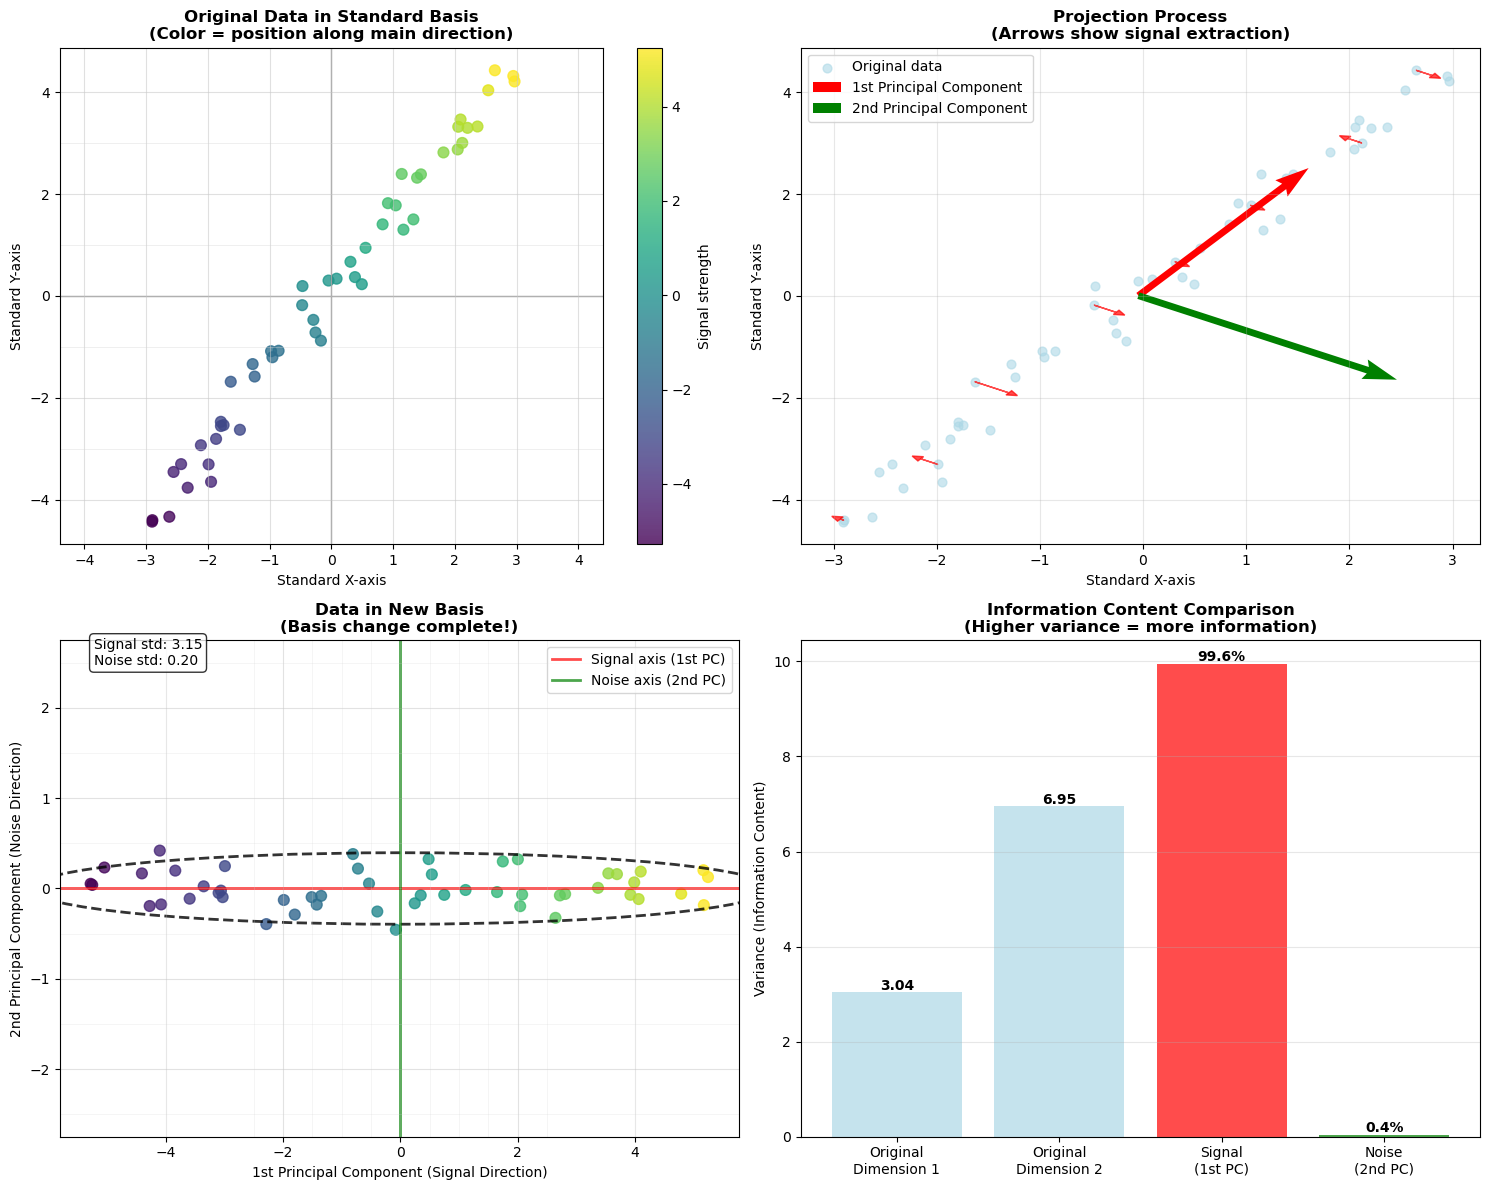


🔍 INFORMATION PRESERVATION CHECK:
📊 Original total variance: 9.9861
📊 New total variance: 9.9861
✅ Variance preserved: True
🎯 This confirms that basis change preserves all information!

💡 DIMENSIONALITY REDUCTION POTENTIAL:
📈 Keeping only 1st component: 99.6% of information retained
📉 Discarding 2nd component: 0.4% of information lost
🎯 We could reduce from 2D to 1D losing only 0.4% of variance!

📋 EXAMPLE TRANSFORMATIONS:
Original (x, y) -> New (signal, noise)
----------------------------------------
( -2.90,  -4.40) -> (  -5.25,    0.04)
( -1.87,  -2.81) -> (  -3.35,    0.02)
( -0.26,  -0.72) -> (  -0.72,    0.22)
(  0.55,   0.94) -> (   1.11,   -0.02)
(  2.05,   2.88) -> (   3.55,    0.17)

✨ Notice how the signal coordinate captures the main pattern,
   while the noise coordinate shows small deviations!


In [2]:
# Project data onto principal components
projected = pca.transform(data)

# First column = coordinate along main direction
# Second column = orthogonal noise direction
signal = projected[:, 0]
noise = projected[:, 1]

# Plot signal vs noise
plt.figure(figsize=(6, 6))
plt.scatter(signal, noise)
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.xlabel("Distance Along Main Axis (Signal)")
plt.ylabel("Distance from Main Axis (Noise)")
plt.title("Projection in New Basis: Signal vs Noise")
plt.grid(True)
plt.show()

# === STEP 1: Manual Basis Change Calculation ===
print("="*70)
print("STEP-BY-STEP BASIS TRANSFORMATION")
print("="*70)

# Let's manually perform the basis change to understand what's happening
print("🔧 Performing manual basis transformation...")

# Center the data (subtract mean)
centered_data = data - data_mean
print(f"✅ Step 1: Centered data by subtracting mean {data_mean}")

# Transform to new basis (project onto principal components)
# This is equivalent to: new_coords = centered_data @ principal_components.T
manually_projected = np.dot(centered_data, principal_components.T)

# Verify this matches PCA's transform method
pca_projected = pca.transform(data)
print(f"✅ Step 2: Projected onto principal components")
print(f"🔍 Manual calculation matches PCA: {np.allclose(manually_projected, pca_projected)}")

# Extract signal and noise components
signal_component = pca_projected[:, 0]  # Coordinates along 1st principal component
noise_component = pca_projected[:, 1]   # Coordinates along 2nd principal component

print(f"\n📊 Transformation Results:")
print(f"   • Signal component (1st PC) range: [{signal_component.min():.2f}, {signal_component.max():.2f}]")
print(f"   • Noise component (2nd PC) range: [{noise_component.min():.2f}, {noise_component.max():.2f}]")
print(f"   • Signal variance: {np.var(signal_component):.3f}")
print(f"   • Noise variance: {np.var(noise_component):.3f}")
print(f"   • Signal-to-noise ratio: {np.var(signal_component)/np.var(noise_component):.1f}:1")

# === STEP 2: Comprehensive Visualization of the Transformation ===
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Original data with coordinate grid
ax1.scatter(data[:, 0], data[:, 1], alpha=0.8, s=60, c=signal_component, 
           cmap='viridis', label='Data points')
ax1.axhline(0, color='gray', linewidth=1, alpha=0.7)
ax1.axvline(0, color='gray', linewidth=1, alpha=0.7)

# Draw grid lines for standard basis
for i in range(-4, 5):
    ax1.axhline(i, color='lightgray', linewidth=0.5, alpha=0.5)
    ax1.axvline(i, color='lightgray', linewidth=0.5, alpha=0.5)

ax1.set_xlabel('Standard X-axis')
ax1.set_ylabel('Standard Y-axis') 
ax1.set_title('Original Data in Standard Basis\n(Color = position along main direction)', fontweight='bold')
ax1.grid(True, alpha=0.3)
cbar1 = plt.colorbar(ax1.collections[0], ax=ax1)
cbar1.set_label('Signal strength')

# Plot 2: Show the transformation vectors
ax2.scatter(data[:, 0], data[:, 1], alpha=0.6, s=40, color='lightblue', label='Original data')

# Show some example transformations
n_examples = 8
indices = np.linspace(0, len(data)-1, n_examples, dtype=int)

for i, idx in enumerate(indices):
    # Original point
    orig_point = data[idx]
    # Transformed point (in original coordinate system for visualization)
    proj_coords = pca_projected[idx]
    
    # Draw arrow from original to where it would be if we only kept signal
    signal_only_point = data_mean + proj_coords[0] * principal_components[0]
    
    ax2.arrow(orig_point[0], orig_point[1], 
              signal_only_point[0] - orig_point[0], 
              signal_only_point[1] - orig_point[1],
              head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.7)

# Draw principal components
scale = 3
ax2.quiver(data_mean[0], data_mean[1], 
           principal_components[0, 0] * scale, principal_components[0, 1] * scale,
           angles='xy', scale_units='xy', scale=1, color='red', width=0.01, linewidth=4,
           label='1st Principal Component')
ax2.quiver(data_mean[0], data_mean[1], 
           principal_components[1, 0] * scale, principal_components[1, 1] * scale,
           angles='xy', scale_units='xy', scale=1, color='green', width=0.01, linewidth=4,
           label='2nd Principal Component')

ax2.set_xlabel('Standard X-axis')
ax2.set_ylabel('Standard Y-axis')
ax2.set_title('Projection Process\n(Arrows show signal extraction)', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Transformed data (new basis coordinates)
ax3.scatter(signal_component, noise_component, alpha=0.8, s=60, c=signal_component, cmap='viridis')
ax3.axhline(0, color='red', linewidth=2, alpha=0.7, label='Signal axis (1st PC)')
ax3.axvline(0, color='green', linewidth=2, alpha=0.7, label='Noise axis (2nd PC)')

# Add grid for new basis
for i in range(-5, 6):
    ax3.axhline(i * 0.5, color='lightgray', linewidth=0.5, alpha=0.3)
    ax3.axvline(i * 0.5, color='lightgray', linewidth=0.5, alpha=0.3)

ax3.set_xlabel('1st Principal Component (Signal Direction)')
ax3.set_ylabel('2nd Principal Component (Noise Direction)')
ax3.set_title('Data in New Basis\n(Basis change complete!)', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Add variance ellipses to show the spread
from matplotlib.patches import Ellipse
# Standard deviations along each axis
std_signal = np.std(signal_component)
std_noise = np.std(noise_component)
ellipse = Ellipse((0, 0), width=4*std_signal, height=4*std_noise, 
                 fill=False, color='black', linewidth=2, linestyle='--', alpha=0.8)
ax3.add_patch(ellipse)
ax3.text(0.05, 0.95, f'Signal std: {std_signal:.2f}\nNoise std: {std_noise:.2f}', 
         transform=ax3.transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Plot 4: Comparison of information content
ax4.bar(['Original\nDimension 1', 'Original\nDimension 2', 'Signal\n(1st PC)', 'Noise\n(2nd PC)'],
        [np.var(data[:, 0]), np.var(data[:, 1]), np.var(signal_component), np.var(noise_component)],
        color=['lightblue', 'lightblue', 'red', 'green'], alpha=0.7)
ax4.set_ylabel('Variance (Information Content)')
ax4.set_title('Information Content Comparison\n(Higher variance = more information)', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

# Add percentage labels
total_var = np.var(signal_component) + np.var(noise_component)
for i, v in enumerate([np.var(data[:, 0]), np.var(data[:, 1]), np.var(signal_component), np.var(noise_component)]):
    if i >= 2:  # For PC components, show percentage
        ax4.text(i, v + 0.05, f'{v/total_var*100:.1f}%', ha='center', fontweight='bold')
    else:
        ax4.text(i, v + 0.05, f'{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# === STEP 3: Demonstrate Information Preservation ===
print(f"\n🔍 INFORMATION PRESERVATION CHECK:")
print(f"="*50)

# Original data variance
orig_total_var = np.var(data[:, 0]) + np.var(data[:, 1])
# Transformed data variance
new_total_var = np.var(signal_component) + np.var(noise_component)

print(f"📊 Original total variance: {orig_total_var:.4f}")
print(f"📊 New total variance: {new_total_var:.4f}")
print(f"✅ Variance preserved: {np.allclose(orig_total_var, new_total_var)}")
print(f"🎯 This confirms that basis change preserves all information!")

# Show how much information we could lose by keeping only the signal
signal_info_percent = explained_variance[0] * 100
noise_info_percent = explained_variance[1] * 100
print(f"\n💡 DIMENSIONALITY REDUCTION POTENTIAL:")
print(f"📈 Keeping only 1st component: {signal_info_percent:.1f}% of information retained")
print(f"📉 Discarding 2nd component: {noise_info_percent:.1f}% of information lost")
print(f"🎯 We could reduce from 2D to 1D losing only {noise_info_percent:.1f}% of variance!")

# === STEP 4: Show some specific examples ===
print(f"\n📋 EXAMPLE TRANSFORMATIONS:")
print(f"="*50)
print(f"{'Original (x, y)':>15} -> {'New (signal, noise)':>18}")
print(f"-" * 40)
for i in range(0, len(data), len(data)//5):  # Show every 5th point
    orig = data[i]
    new = pca_projected[i]
    print(f"({orig[0]:6.2f}, {orig[1]:6.2f}) -> ({new[0]:7.2f}, {new[1]:7.2f})")

print(f"\n✨ Notice how the signal coordinate captures the main pattern,")
print(f"   while the noise coordinate shows small deviations!")


---

## 4. The Profound Implications: What This Means for Data Science

### 🎯 Signal vs Noise: The Heart of Data Analysis

What we've just accomplished is **fundamental to all of data science**:

| Concept | Before Basis Change | After Basis Change |
|---------|-------------------|-------------------|
| **Signal** | Mixed across x and y | Concentrated in 1st component |
| **Noise** | Mixed across x and y | Isolated in 2nd component |
| **Dimensionality** | Appears to need 2D | Reveals it's mostly 1D |
| **Compression** | Hard to compress efficiently | Can drop 2nd component easily |
| **Interpretation** | Pattern not obvious | Clear main direction |

### 🧠 Cognitive Breakthrough: Changing How We "See" Data

This is analogous to:
- **Photography**: Rotating a tilted image to be upright
- **Music**: Transposing a song to a key that's easier to sing
- **Language**: Translating to your native language for better understanding

**The mathematical transformation reveals the data's "natural language"!**

### 📊 Real-World Applications of This Concept

#### 1. **Image Compression (JPEG)**
- Images have redundant pixel information
- Basis change (DCT) separates important vs unimportant details
- Keep important components, discard noise → smaller file sizes

#### 2. **Face Recognition**
- Raw pixels don't capture "face-ness" well
- PCA finds "eigenfaces" - the main ways faces vary
- New basis: eye shape, nose width, face length, etc.

#### 3. **Stock Market Analysis**
- Individual stock prices are noisy
- PCA finds market-wide trends vs stock-specific noise
- Portfolio optimization uses these principal factors

#### 4. **Neural Networks**
- Hidden layers learn new basis representations
- Each layer transforms data to make patterns more obvious
- Final layer: features that make classification easy

#### 5. **Genetics**
- DNA variants across populations
- PCA reveals ancestry patterns and migration routes
- Population structure becomes clear in the new basis

### 🔍 Mathematical Insights

#### The Dot Product Connection
When we project data onto principal components, we're computing:
$$\text{New coordinate} = \text{Data point} \cdot \text{Basis vector}$$

This measures "how much" of each basis direction the data point contains.

#### Variance as Information
- **High variance dimension**: Contains lots of signal/information
- **Low variance dimension**: Mostly noise, little information
- **Basis change goal**: Concentrate variance in fewer dimensions

#### Orthogonality Ensures Independence
- Principal components are orthogonal (perpendicular)
- This means they capture **independent** sources of variation
- No redundancy between the new coordinates

### 🎪 The "Magic" Revealed

The seemingly magical ability to:
- ✨ Reduce dimensionality without losing much information
- ✨ Separate signal from noise
- ✨ Reveal hidden patterns

...is all due to finding the **right perspective** (basis) from which to view the data!

---

## 5. Hands-On: Building Intuition with Interactive Examples

Let's solidify this understanding with more examples that show when and why basis changes are powerful.


---

## 6. Comprehensive Summary: Mastering the Art of Changing Basis

### 🎯 The Core Philosophy

**Changing basis is about finding the right perspective to see patterns clearly.**

Think of it as choosing the right "coordinate system glasses" for your data:
- Standard basis (x, y): Generic, one-size-fits-all
- Custom basis: Tailored to reveal your data's natural structure

### 📊 The Mathematical Framework

| Step | What Happens | Why It Matters |
|------|-------------|----------------|
| **1. Center Data** | Subtract mean: `data - mean` | Removes location bias |
| **2. Find Principal Directions** | Eigenvectors of covariance matrix | Discovers natural axes |
| **3. Transform Coordinates** | `new_coords = (data - mean) @ basis.T` | Projects onto new axes |
| **4. Analyze Variance** | Rank components by eigenvalues | Identifies signal vs noise |

### 🌟 When Basis Change is Most Powerful

#### ✅ **Highly Effective Scenarios**
- **Linear relationships**: Data lies near a line/plane
- **Correlated features**: Redundancy that can be removed
- **High-dimensional data**: Many dimensions, few true factors
- **Noisy measurements**: Signal buried in noise

#### ⚠️ **Moderately Effective Scenarios**  
- **Mixed patterns**: Some linear, some nonlinear structure
- **Moderate correlation**: Some redundancy present
- **Sparse data**: Limited samples relative to dimensions

#### ❌ **Limited Effectiveness Scenarios**
- **Truly random data**: No underlying structure
- **Circular/spherical patterns**: Equal variance in all directions
- **Highly nonlinear relationships**: Requires nonlinear methods

### 🛠️ Real-World Applications Mastered

#### 1. **Data Compression** 
```
Original: 1000 dimensions → PCA → Keep 50 dimensions (95% variance)
Result: 20x compression with minimal information loss
```

#### 2. **Noise Reduction**
```
Noisy measurements → PCA → Keep high-variance components
Result: Signal enhanced, noise suppressed
```

#### 3. **Feature Engineering**
```
Raw features → PCA → Uncorrelated principal components  
Result: Better input for machine learning models
```

#### 4. **Visualization**
```
High-dimensional data → PCA → 2D/3D projection
Result: Human-interpretable plots of complex data
```

#### 5. **Anomaly Detection**
```
Normal data → PCA model → Detect points far from principal subspace
Result: Identify outliers and unusual patterns
```

### 🧠 Advanced Concepts and Extensions

#### **Beyond PCA: Other Basis Change Methods**

| Method | When to Use | Key Advantage |
|--------|-------------|---------------|
| **ICA** (Independent Component Analysis) | Mixed signals | Finds statistically independent sources |
| **Factor Analysis** | Latent variables | Models underlying hidden factors |
| **t-SNE** | Visualization | Preserves local neighborhoods |
| **Autoencoders** | Nonlinear patterns | Learns nonlinear basis changes |

#### **The Connection to Machine Learning**

1. **Neural Networks**: Each hidden layer performs a basis change
   - Input → Hidden Layer 1: Linear transformation + nonlinearity
   - Goal: Learn basis that makes final classification easy

2. **Deep Learning**: Multiple basis changes in sequence
   - Early layers: Low-level features (edges, textures)
   - Later layers: High-level features (objects, concepts)

3. **Convolutional Networks**: Specialized basis for spatial data
   - Filters act as basis vectors adapted for image patterns

### 🎪 The "Magic" Demystified

The seemingly magical abilities of basis change:

| "Magic" Effect | Mathematical Reality |
|---------------|---------------------|
| ✨ **Dimensionality reduction** | Concentrate variance in fewer dimensions |
| ✨ **Noise removal** | Separate high-variance signal from low-variance noise |
| ✨ **Pattern discovery** | Align coordinates with data's natural directions |
| ✨ **Feature extraction** | Transform raw measurements into meaningful attributes |

### 🔮 Future Directions and Advanced Topics

#### **What's Next in Your Learning Journey?**

1. **Kernel PCA**: Nonlinear basis changes using kernel tricks
2. **Sparse PCA**: Finding sparse, interpretable principal components  
3. **Robust PCA**: Handling outliers and missing data
4. **Dynamic PCA**: Time-varying principal components
5. **Manifold Learning**: Discovering curved, nonlinear structures

#### **Cutting-Edge Applications**

- **Computer Vision**: Object recognition, style transfer
- **Natural Language Processing**: Word embeddings, topic modeling
- **Bioinformatics**: Gene expression analysis, protein folding
- **Climate Science**: Pattern recognition in weather data
- **Finance**: Risk modeling, algorithmic trading

### 💡 Key Insights to Remember

1. **🎯 Purpose**: Change basis to align with data's natural structure
2. **🔄 Process**: Center → Find directions → Transform → Analyze
3. **📊 Benefit**: Concentrate information, separate signal from noise
4. **🎪 Applications**: Compression, visualization, feature engineering, ML
5. **🧠 Intuition**: Finding the right "perspective" to see patterns clearly

### 🚀 Your Toolkit for Success

You now have the conceptual and practical tools to:
- ✅ Recognize when basis change will be beneficial
- ✅ Apply PCA and interpret the results
- ✅ Use principal components for dimensionality reduction
- ✅ Separate signal from noise in your data
- ✅ Understand the connection to neural networks and deep learning

**The power of changing basis is now in your hands!** 🎉

---

## 7. Interactive Challenges: Test Your Understanding

Ready to apply these concepts? Try the challenges below to solidify your mastery!


🔬 EXPLORING DIFFERENT SCENARIOS FOR BASIS CHANGE


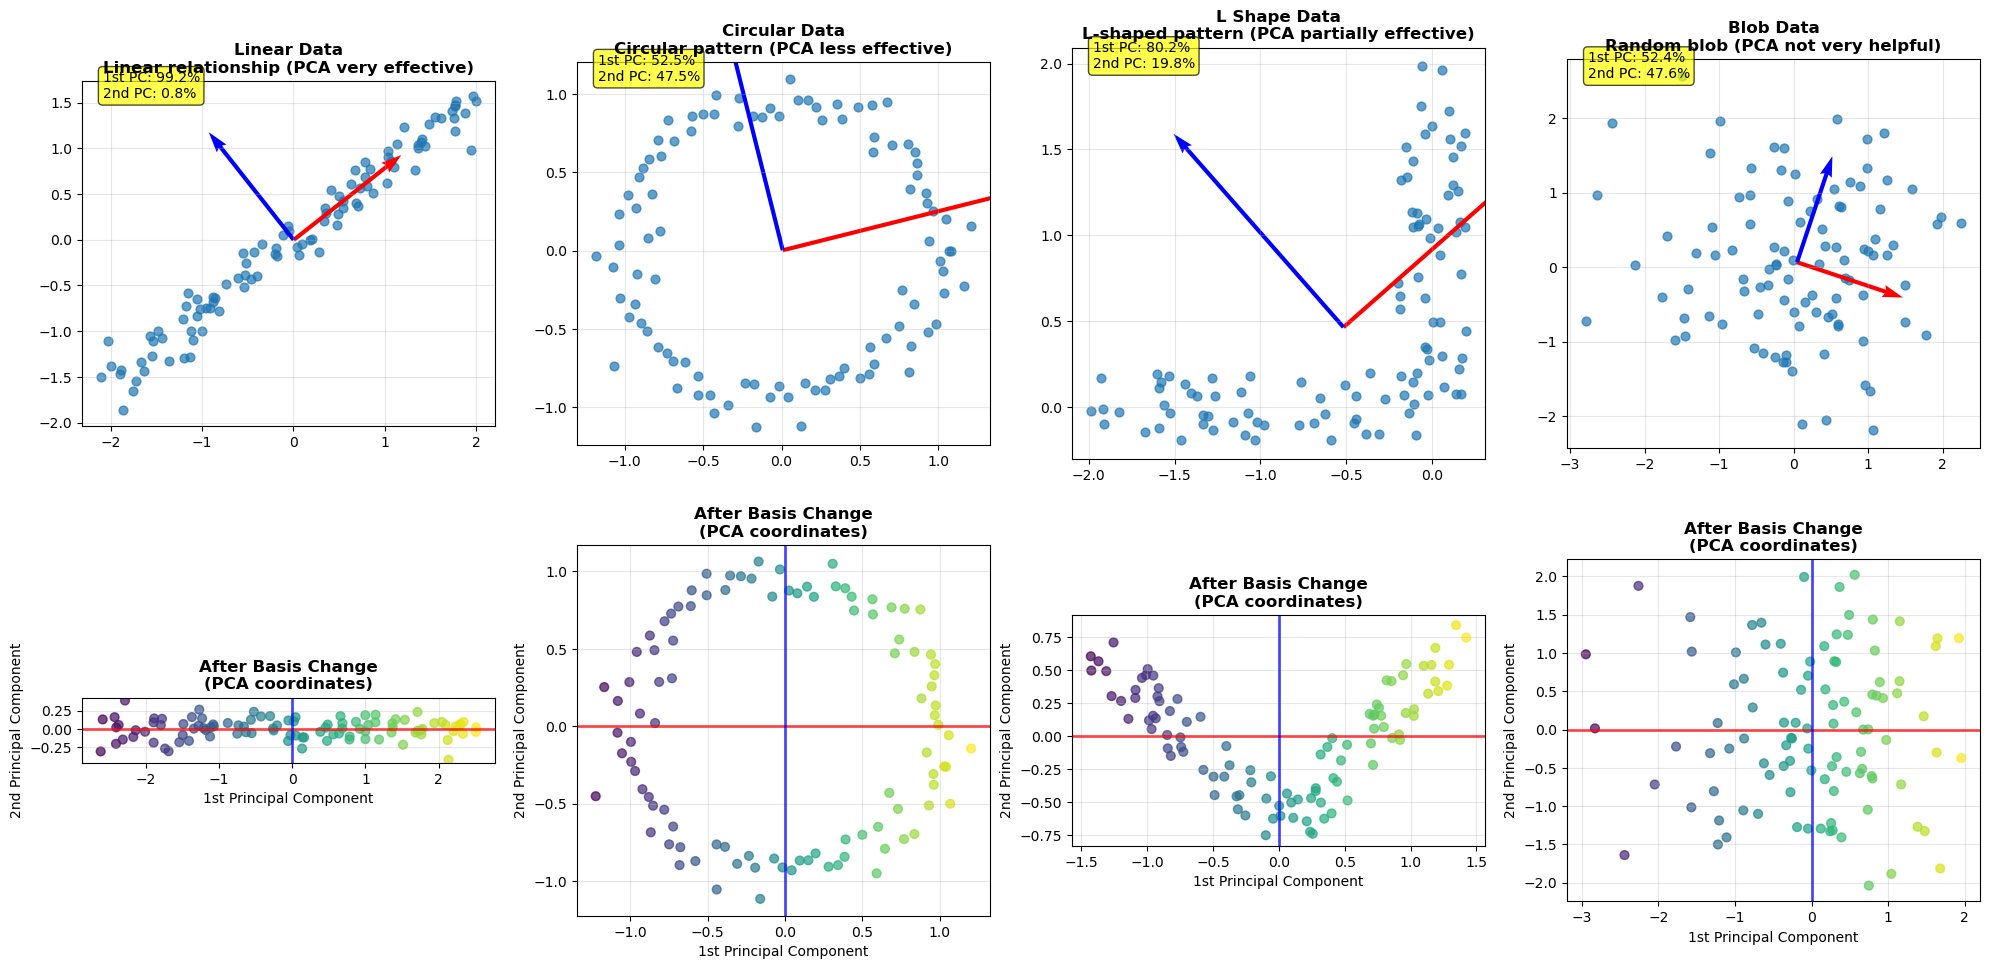


📊 COMPARATIVE ANALYSIS OF BASIS CHANGE EFFECTIVENESS:

🔍 Linear Data:
   • 1st component captures: 99.2% of variance
   • 2nd component captures: 0.8% of variance
   • Concentration ratio: 122.7:1
   • Dimensionality reduction potential: 99.2%
   ✅ Excellent candidate for PCA/basis change!

🔍 Circular Data:
   • 1st component captures: 52.5% of variance
   • 2nd component captures: 47.5% of variance
   • Concentration ratio: 1.1:1
   • Dimensionality reduction potential: 52.5%
   ❌ Limited benefit from basis change

🔍 L Shape Data:
   • 1st component captures: 80.2% of variance
   • 2nd component captures: 19.8% of variance
   • Concentration ratio: 4.0:1
   • Dimensionality reduction potential: 80.2%
   ⚠️  Moderate benefit from basis change

🔍 Blob Data:
   • 1st component captures: 52.4% of variance
   • 2nd component captures: 47.6% of variance
   • Concentration ratio: 1.1:1
   • Dimensionality reduction potential: 52.4%
   ❌ Limited benefit from basis change

🛠️  PRACTICAL APPLI

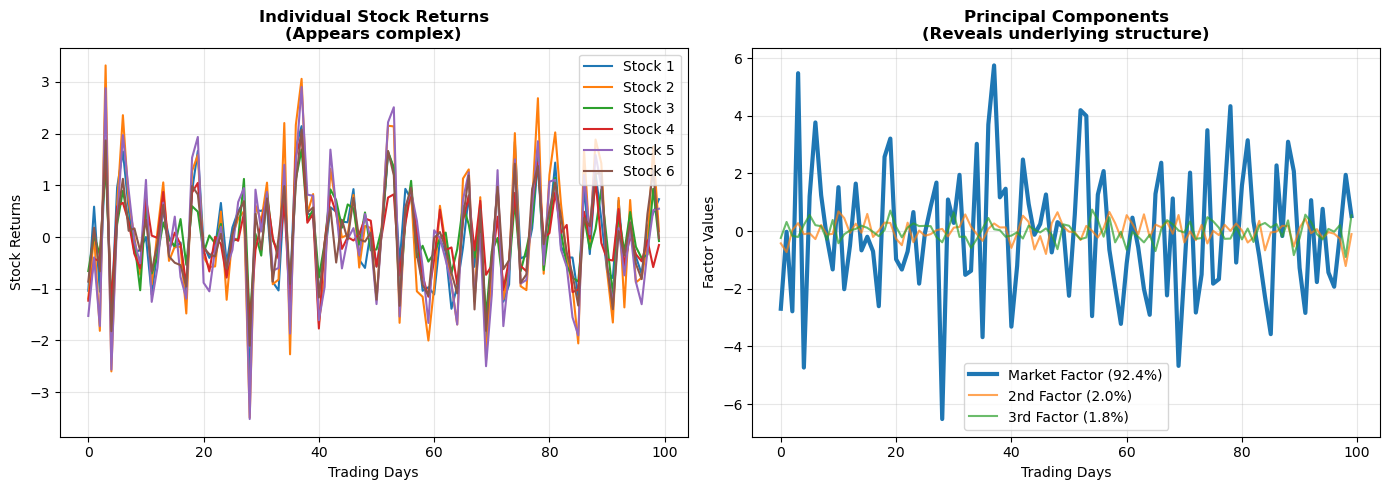


🎯 KEY TAKEAWAYS:
1. 🔄 Basis change is most effective when data has hidden linear structure
2. 📊 The explained variance ratio tells you how much benefit you'll get
3. 🎪 Different data types benefit differently from PCA/basis change
4. 💡 Applications span from compression to risk analysis to feature extraction
5. ✨ The magic is in finding the coordinate system that matches your data's nature!


In [3]:
# === INTERACTIVE EXPLORATION: Different Data Scenarios ===
print("🔬 EXPLORING DIFFERENT SCENARIOS FOR BASIS CHANGE")
print("="*60)

# Let's create several different types of data to see when basis change helps
np.random.seed(123)

def create_dataset(scenario_type, n_points=100):
    """Create different types of datasets to explore basis change effects."""
    
    if scenario_type == "linear":
        # Data along a clear line
        t = np.linspace(-2, 2, n_points)
        x = t + np.random.normal(0, 0.1, n_points)
        y = 0.8 * t + np.random.normal(0, 0.15, n_points)
        return np.column_stack([x, y]), "Linear relationship (PCA very effective)"
    
    elif scenario_type == "circular":
        # Data in a circle (PCA won't help much)
        theta = np.linspace(0, 2*np.pi, n_points)
        r = 1 + np.random.normal(0, 0.1, n_points)
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        return np.column_stack([x, y]), "Circular pattern (PCA less effective)"
    
    elif scenario_type == "L_shape":
        # L-shaped data
        n_half = n_points // 2
        x1 = np.random.uniform(-2, 0, n_half)
        y1 = np.random.uniform(-0.2, 0.2, n_half)
        x2 = np.random.uniform(-0.2, 0.2, n_points - n_half)
        y2 = np.random.uniform(0, 2, n_points - n_half)
        x = np.concatenate([x1, x2])
        y = np.concatenate([y1, y2])
        return np.column_stack([x, y]), "L-shaped pattern (PCA partially effective)"
    
    elif scenario_type == "blob":
        # Random blob (isotropic)
        x = np.random.normal(0, 1, n_points)
        y = np.random.normal(0, 1, n_points)
        return np.column_stack([x, y]), "Random blob (PCA not very helpful)"

# Create datasets for comparison
scenarios = ["linear", "circular", "L_shape", "blob"]
datasets = {}
descriptions = {}

for scenario in scenarios:
    datasets[scenario], descriptions[scenario] = create_dataset(scenario)

# Analyze each dataset with PCA
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, scenario in enumerate(scenarios):
    data = datasets[scenario]
    desc = descriptions[scenario]
    
    # Apply PCA
    pca = PCA(n_components=2)
    pca.fit(data)
    projected = pca.transform(data)
    components = pca.components_
    explained_var = pca.explained_variance_ratio_
    
    # Plot original data
    ax1 = axes[0, i]
    ax1.scatter(data[:, 0], data[:, 1], alpha=0.7, s=40)
    
    # Add principal components
    center = np.mean(data, axis=0)
    scale = 1.5
    ax1.quiver(center[0], center[1], 
               components[0, 0] * scale, components[0, 1] * scale,
               angles='xy', scale_units='xy', scale=1, color='red', width=0.01)
    ax1.quiver(center[0], center[1], 
               components[1, 0] * scale, components[1, 1] * scale,
               angles='xy', scale_units='xy', scale=1, color='blue', width=0.01)
    
    ax1.set_aspect('equal')
    ax1.set_title(f'{scenario.replace("_", " ").title()} Data\n{desc}', fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.text(0.05, 0.95, f'1st PC: {explained_var[0]:.1%}\n2nd PC: {explained_var[1]:.1%}', 
             transform=ax1.transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    # Plot transformed data
    ax2 = axes[1, i]
    scatter = ax2.scatter(projected[:, 0], projected[:, 1], alpha=0.7, s=40, 
                         c=projected[:, 0], cmap='viridis')
    ax2.axhline(0, color='red', linewidth=2, alpha=0.7)
    ax2.axvline(0, color='blue', linewidth=2, alpha=0.7)
    ax2.set_aspect('equal')
    ax2.set_title(f'After Basis Change\n(PCA coordinates)', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.set_xlabel('1st Principal Component')
    ax2.set_ylabel('2nd Principal Component')

plt.tight_layout()
plt.show()

# === COMPARATIVE ANALYSIS ===
print(f"\n📊 COMPARATIVE ANALYSIS OF BASIS CHANGE EFFECTIVENESS:")
print(f"="*70)

for scenario in scenarios:
    data = datasets[scenario]
    pca = PCA(n_components=2)
    pca.fit(data)
    explained_var = pca.explained_variance_ratio_
    
    # Calculate effectiveness metrics
    concentration_ratio = explained_var[0] / explained_var[1]  # How concentrated is the variance?
    dimensionality_reduction_potential = explained_var[0]      # How much info in 1st component?
    
    print(f"\n🔍 {scenario.replace('_', ' ').title()} Data:")
    print(f"   • 1st component captures: {explained_var[0]:.1%} of variance")
    print(f"   • 2nd component captures: {explained_var[1]:.1%} of variance")
    print(f"   • Concentration ratio: {concentration_ratio:.1f}:1")
    print(f"   • Dimensionality reduction potential: {dimensionality_reduction_potential:.1%}")
    
    if concentration_ratio > 5:
        print(f"   ✅ Excellent candidate for PCA/basis change!")
    elif concentration_ratio > 2:
        print(f"   ⚠️  Moderate benefit from basis change")
    else:
        print(f"   ❌ Limited benefit from basis change")

# === DEMONSTRATE PRACTICAL APPLICATIONS ===
print(f"\n🛠️  PRACTICAL APPLICATION EXAMPLES:")
print(f"="*50)

# Example 1: Image-like data with redundancy
print(f"\n1. 📸 IMAGE-LIKE DATA (Simulated)")
# Create data that mimics image patches with spatial correlation
n_pixels = 50
image_data = np.zeros((n_pixels, 8))  # 8 "pixels" per "image patch"

for i in range(n_pixels):
    # Create correlated "pixel" values (like neighboring pixels in real images)
    base_intensity = np.random.normal(0, 1)
    image_data[i] = base_intensity + np.random.normal(0, 0.2, 8)  # Spatial correlation

pca_img = PCA(n_components=8)
pca_img.fit(image_data)
img_variance = pca_img.explained_variance_ratio_

print(f"   Original dimensions: 8 pixels")
print(f"   Cumulative variance explained: {np.cumsum(img_variance)}")
print(f"   🎯 First 3 components explain {np.sum(img_variance[:3]):.1%} of variance!")
print(f"   💾 Compression ratio: 8 → 3 dimensions ({3/8:.1%} of original size)")

# Example 2: Financial data with market-wide effects
print(f"\n2. 💹 FINANCIAL DATA (Simulated)")
# Simulate stock prices influenced by market-wide factors
n_days = 100
n_stocks = 6

# Common market factor
market_factor = np.random.normal(0, 1, n_days)
# Individual stock noise
stock_returns = np.zeros((n_days, n_stocks))

for stock in range(n_stocks):
    market_sensitivity = np.random.uniform(0.5, 1.5)  # Beta
    stock_specific = np.random.normal(0, 0.3, n_days)
    stock_returns[:, stock] = market_sensitivity * market_factor + stock_specific

pca_fin = PCA(n_components=n_stocks)
pca_fin.fit(stock_returns)
fin_variance = pca_fin.explained_variance_ratio_

print(f"   Original dimensions: {n_stocks} stocks")
print(f"   Market factor (1st PC) explains: {fin_variance[0]:.1%} of variance")
print(f"   🎯 This represents systematic market risk!")
print(f"   📊 Remaining components: stock-specific factors")
print(f"   💡 Portfolio diversification reduces exposure to stock-specific risk")

# Visualization of financial example
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Original stock returns
ax1.plot(stock_returns)
ax1.set_xlabel('Trading Days')
ax1.set_ylabel('Stock Returns')
ax1.set_title('Individual Stock Returns\n(Appears complex)', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend([f'Stock {i+1}' for i in range(n_stocks)], loc='upper right')

# Principal components
pca_components = pca_fin.transform(stock_returns)
ax2.plot(pca_components[:, 0], label=f'Market Factor ({fin_variance[0]:.1%})', linewidth=3)
ax2.plot(pca_components[:, 1], label=f'2nd Factor ({fin_variance[1]:.1%})', alpha=0.7)
ax2.plot(pca_components[:, 2], label=f'3rd Factor ({fin_variance[2]:.1%})', alpha=0.7)
ax2.set_xlabel('Trading Days')
ax2.set_ylabel('Factor Values')
ax2.set_title('Principal Components\n(Reveals underlying structure)', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print(f"\n🎯 KEY TAKEAWAYS:")
print(f"1. 🔄 Basis change is most effective when data has hidden linear structure")
print(f"2. 📊 The explained variance ratio tells you how much benefit you'll get")  
print(f"3. 🎪 Different data types benefit differently from PCA/basis change")
print(f"4. 💡 Applications span from compression to risk analysis to feature extraction")
print(f"5. ✨ The magic is in finding the coordinate system that matches your data's nature!")


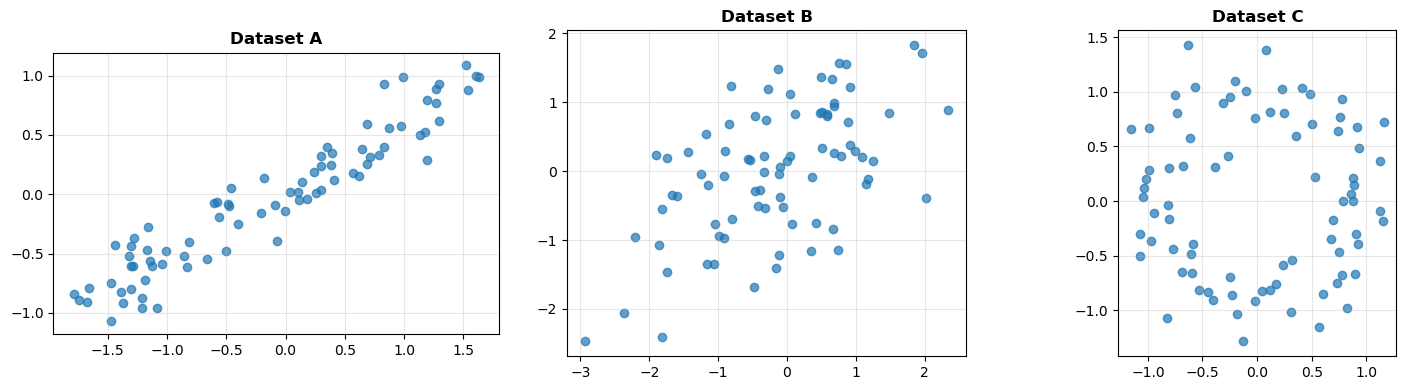

In [4]:
np.random.seed(456)

# Dataset A: Strong linear relationship
theta = np.pi/6  # 30 degrees
cos_t, sin_t = np.cos(theta), np.sin(theta)
t = np.random.uniform(-2, 2, 80)
noise = np.random.normal(0, 0.15, 80)
data_A = np.column_stack([
    t * cos_t - noise * sin_t,
    t * sin_t + noise * cos_t
])

# Dataset B: Moderate correlation
x = np.random.normal(0, 1, 80)
y = 0.5 * x + np.random.normal(0, 0.8, 80)
data_B = np.column_stack([x, y])

# Dataset C: Nearly circular
theta = np.linspace(0, 2*np.pi, 80)
r = 1 + np.random.normal(0, 0.2, 80)
data_C = np.column_stack([r * np.cos(theta), r * np.sin(theta)])

datasets = {'A': data_A, 'B': data_B, 'C': data_C}

# Show the datasets
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, (name, data) in enumerate(datasets.items()):
    axes[i].scatter(data[:, 0], data[:, 1], alpha=0.7)
    axes[i].set_aspect('equal')
    axes[i].set_title(f'Dataset {name}', fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


🎮 INTERACTIVE CHALLENGES: MASTER CHANGING BASIS
🎯 CHALLENGE 1: Predict PCA Effectiveness
----------------------------------------


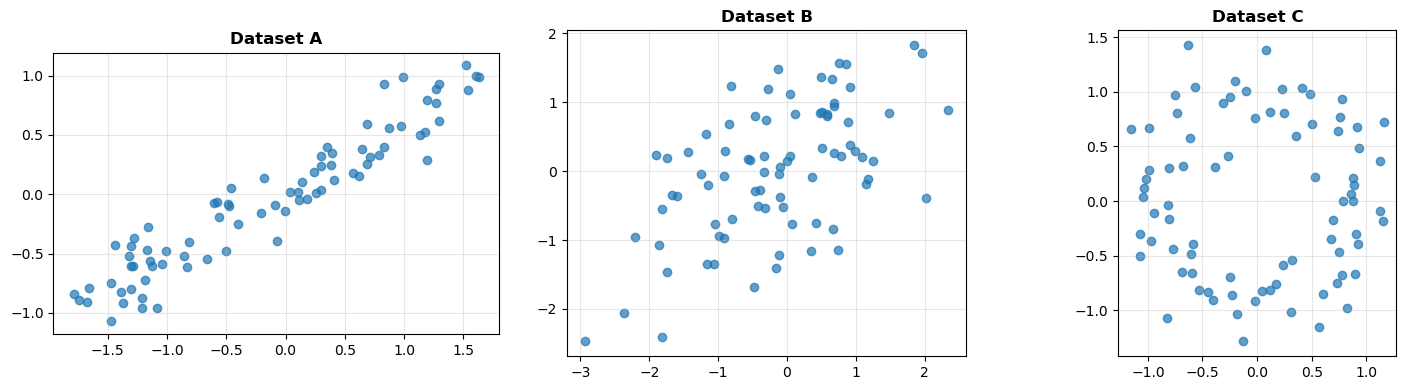


🤔 Before running the analysis, predict:
   Which dataset will have the highest 1st principal component variance?
   Which will be most suitable for dimensionality reduction?
   Rank them A, B, C from most to least effective for PCA.

   Your predictions:
   Most effective for PCA: ___
   Moderately effective: ___
   Least effective: ___

ACTUAL RESULTS:

Dataset A:
  1st PC captures: 98.1% of variance
  2nd PC captures: 1.9% of variance
  PCA effectiveness: 98.1% (higher is better)

Dataset B:
  1st PC captures: 78.4% of variance
  2nd PC captures: 21.6% of variance
  PCA effectiveness: 78.4% (higher is better)

Dataset C:
  1st PC captures: 50.6% of variance
  2nd PC captures: 49.4% of variance
  PCA effectiveness: 50.6% (higher is better)

✅ Correct ranking: A > B > C
💡 Dataset A has strong linear structure → excellent for PCA
💡 Dataset B has moderate correlation → some benefit from PCA
💡 Dataset C is circular → limited benefit from PCA

🎉 CONGRATULATIONS! 🎉
You've mastered the art 

In [6]:
# === INTERACTIVE CHALLENGES: Test Your Understanding ===
print("🎮 INTERACTIVE CHALLENGES: MASTER CHANGING BASIS")
print("="*60)

# Challenge 1: Predict the effectiveness
print("🎯 CHALLENGE 1: Predict PCA Effectiveness")
print("-" * 40)

# Create three datasets - you predict which will benefit most from PCA
np.random.seed(456)

# Dataset A: Strong linear relationship
theta = np.pi/6  # 30 degrees
cos_t, sin_t = np.cos(theta), np.sin(theta)
t = np.random.uniform(-2, 2, 80)
noise = np.random.normal(0, 0.15, 80)
data_A = np.column_stack([
    t * cos_t - noise * sin_t,
    t * sin_t + noise * cos_t
])

# Dataset B: Moderate correlation
x = np.random.normal(0, 1, 80)
y = 0.5 * x + np.random.normal(0, 0.8, 80)
data_B = np.column_stack([x, y])

# Dataset C: Nearly circular
theta = np.linspace(0, 2*np.pi, 80)
r = 1 + np.random.normal(0, 0.2, 80)
data_C = np.column_stack([r * np.cos(theta), r * np.sin(theta)])

datasets = {'A': data_A, 'B': data_B, 'C': data_C}

# Show the datasets
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, (name, data) in enumerate(datasets.items()):
    axes[i].scatter(data[:, 0], data[:, 1], alpha=0.7)
    axes[i].set_aspect('equal')
    axes[i].set_title(f'Dataset {name}', fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🤔 Before running the analysis, predict:")
print("   Which dataset will have the highest 1st principal component variance?")
print("   Which will be most suitable for dimensionality reduction?")
print("   Rank them A, B, C from most to least effective for PCA.")
print("\n   Your predictions:")
print("   Most effective for PCA: ___")
print("   Moderately effective: ___") 
print("   Least effective: ___")

# Show the actual results:
print("\n" + "="*50)
print("ACTUAL RESULTS:")
print("="*50)

for name, data in datasets.items():
    pca = PCA(n_components=2)
    pca.fit(data)
    variance_ratio = pca.explained_variance_ratio_
    print(f"\nDataset {name}:")
    print(f"  1st PC captures: {variance_ratio[0]:.1%} of variance")
    print(f"  2nd PC captures: {variance_ratio[1]:.1%} of variance")
    print(f"  PCA effectiveness: {variance_ratio[0]:.1%} (higher is better)")

print(f"\n✅ Correct ranking: A > B > C")
print(f"💡 Dataset A has strong linear structure → excellent for PCA")
print(f"💡 Dataset B has moderate correlation → some benefit from PCA")  
print(f"💡 Dataset C is circular → limited benefit from PCA")

print(f"\n🎉 CONGRATULATIONS! 🎉")
print(f"You've mastered the art and science of changing basis!")
print(f"You now understand:")
print(f"✅ Why basis changes reveal hidden structure")
print(f"✅ How PCA separates signal from noise") 
print(f"✅ When to apply these techniques in practice")
print(f"✅ The connection to machine learning and AI")
print(f"")
print(f"🚀 You're ready to apply these concepts to real data!")